In [206]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# scoring functions and data handling
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

['application_test.csv', '.DS_Store', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv']


# Read in Data

In [207]:
# Training data
data = pd.read_csv('../input/application_train.csv')
print('data shape: ', data.shape)
data.head()

data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Split into Training and Testing Data

In [208]:
# Testing data features
# Extract the labels for training
y = data['TARGET']

# copy data over to X (remove target after data analysis and preprocessing)
X = data
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)
print('Training labels shape: ', y_train.shape)
print('Testing labels shape: ', y_test.shape)

Training data shape:  (206032, 122)
Testing data shape:  (101479, 122)
Training labels shape:  (206032,)
Testing labels shape:  (101479,)


## Training Data

In [209]:
X_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
290720,436794,0,Cash loans,F,N,Y,0,180000.0,835380.0,33259.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
219406,354174,0,Cash loans,M,Y,Y,0,225000.0,1256400.0,40657.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
238458,376164,0,Cash loans,F,N,Y,1,225000.0,387144.0,30717.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,5.0
189443,319651,0,Cash loans,F,N,N,0,180000.0,450000.0,33646.5,...,0,0,0,0,0.0,0.0,0.0,9.0,0.0,0.0
32184,137317,0,Cash loans,M,N,Y,0,108000.0,288873.0,14179.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


## Training Labels

In [210]:
y_train.head()

290720    0
219406    0
238458    0
189443    0
32184     0
Name: TARGET, dtype: int64

## Test Data

In [211]:
X_test.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
245895,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
98194,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
36463,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
249923,389171,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
158389,283617,0,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0


# Data Types

In [212]:
# Number of each type of column
X_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [213]:
# Number of unique classes in each object column
X_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# Descriptive Statistics

## Age

In [214]:
(X_train['DAYS_BIRTH'] / -365).describe()

count    206032.000000
mean         43.930820
std          11.945375
min          20.517808
25%          34.005479
50%          43.163014
75%          53.917808
max          69.120548
Name: DAYS_BIRTH, dtype: float64

## Amount of time at current job

In [215]:
X_train['DAYS_EMPLOYED'].describe()

count    206032.000000
mean      63707.827274
std      141187.929590
min      -17583.000000
25%       -2762.000000
50%       -1216.000000
75%        -290.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

## Number of Children

In [216]:
X_train['CNT_CHILDREN'].describe()

count    206032.000000
mean          0.416998
std           0.720007
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

## Income

In [217]:
X_train['AMT_INCOME_TOTAL'].describe()

count    2.060320e+05
mean     1.684606e+05
std      1.017210e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      9.000000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

## Number of Days before application that client changed his/her registration

In [218]:
X_train['DAYS_REGISTRATION'].describe()

count    206032.000000
mean      -4980.791800
std        3522.066467
min      -23416.000000
25%       -7480.000000
50%       -4496.000000
75%       -2002.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

# Distributions of Features

## Target (repaid loan or not)

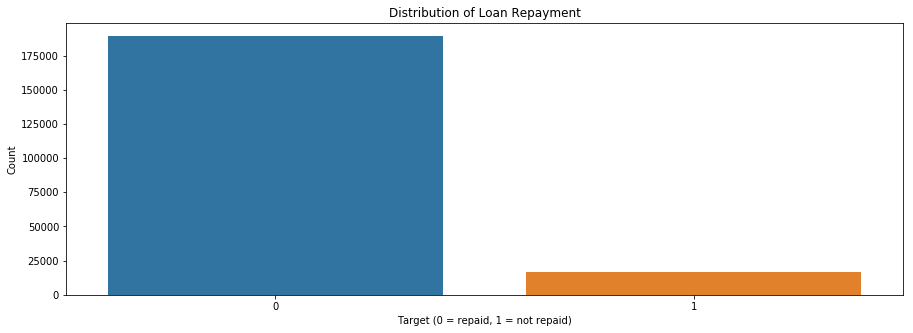

In [219]:
# TARGET value 0 means loan is repayed, value 1 means loan is not repayed.
plt.figure(figsize=(15,5))
sns.countplot(y_train)
plt.xlabel('Target (0 = repaid, 1 = not repaid)'); plt.ylabel('Count'); plt.title('Distribution of Loan Repayment');

## Contract Type

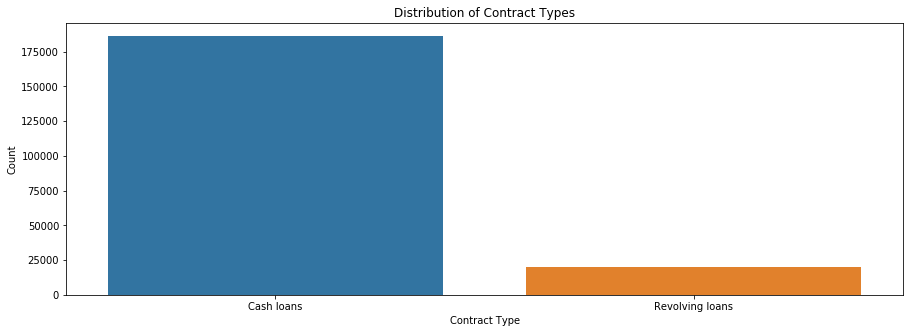

In [220]:
plt.figure(figsize=(15,5))
sns.countplot(X_train.NAME_CONTRACT_TYPE.values,data=X_train)
plt.xlabel('Contract Type'); plt.ylabel('Count'); plt.title('Distribution of Contract Types');

## Gender

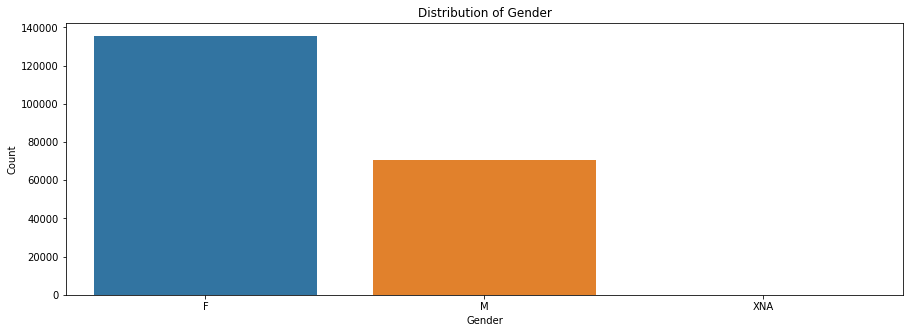

In [221]:
plt.figure(figsize=(15,5))
sns.countplot(X_train.CODE_GENDER.values,data=X_train)
plt.xlabel('Gender'); plt.ylabel('Count'); plt.title('Distribution of Gender');

## Education Type/Level

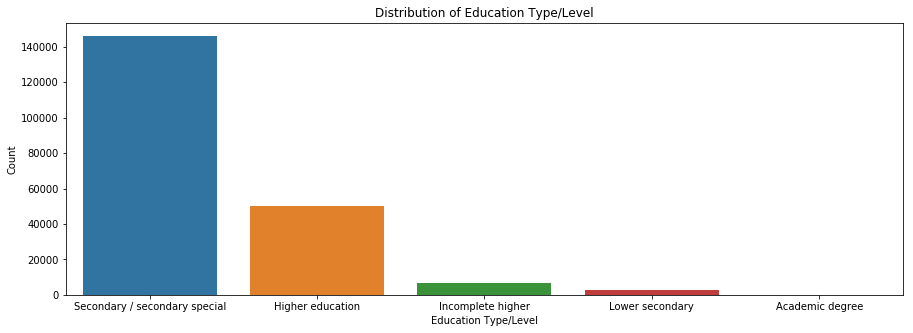

In [222]:
plt.figure(figsize=(15,5))
sns.countplot(X_train.NAME_EDUCATION_TYPE.values,data=X_train)
plt.xlabel('Education Type/Level'); plt.ylabel('Count'); plt.title('Distribution of Education Type/Level');

## Car Ownership

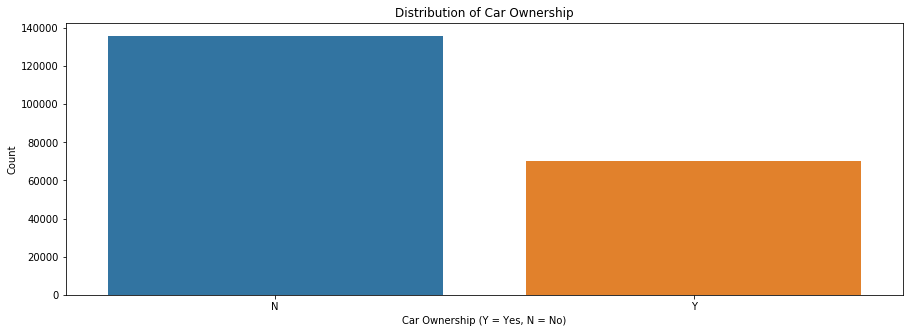

In [223]:
plt.figure(figsize=(15,5))
sns.countplot(X_train.FLAG_OWN_CAR.values,data=X_train)
plt.xlabel('Car Ownership (Y = Yes, N = No)'); plt.ylabel('Count'); plt.title('Distribution of Car Ownership');

## Home Ownership

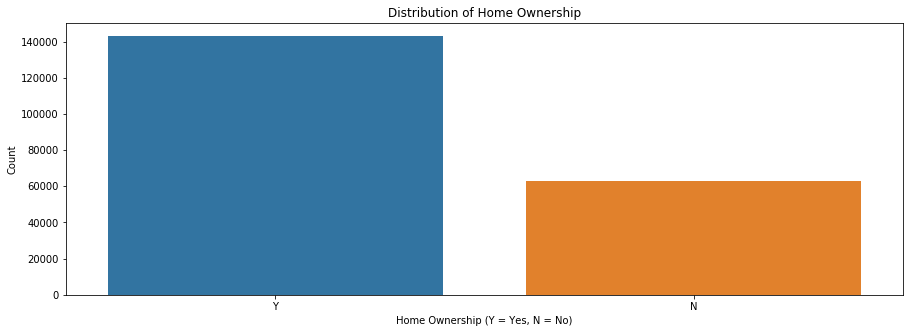

In [224]:
plt.figure(figsize=(15,5))
sns.countplot(X_train.FLAG_OWN_REALTY.values,data=X_train)
plt.xlabel('Home Ownership (Y = Yes, N = No)'); plt.ylabel('Count'); plt.title('Distribution of Home Ownership');

## Number of Children

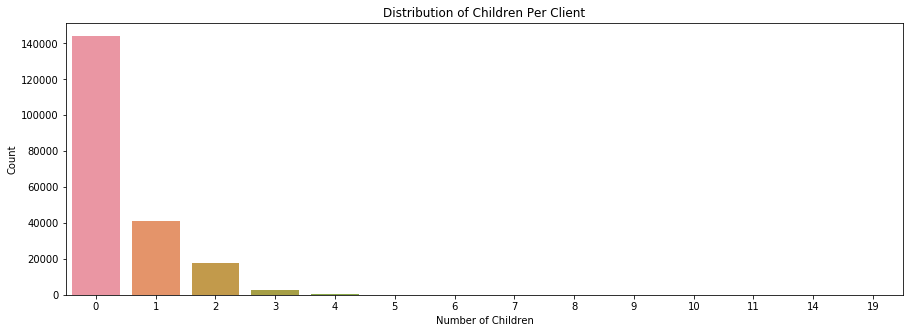

In [225]:
plt.figure(figsize=(15,5))
sns.countplot(X_train.CNT_CHILDREN.values,data=X_train)
plt.xlabel('Number of Children'); plt.ylabel('Count'); plt.title('Distribution of Children Per Client');

## Family Status

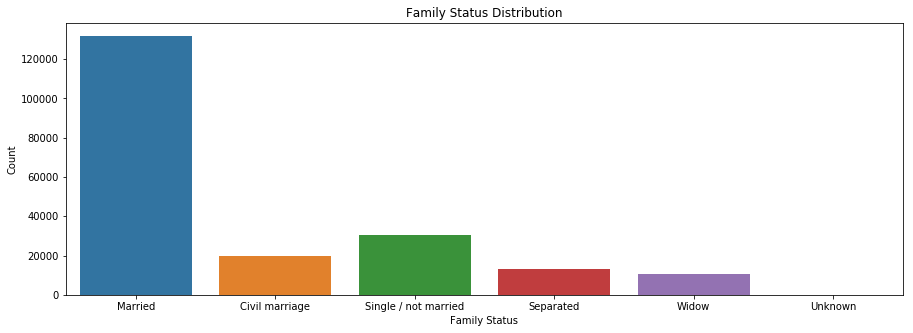

In [226]:
plt.figure(figsize=(15,5))
sns.countplot(X_train.NAME_FAMILY_STATUS.values,data=X_train)
plt.xlabel('Family Status'); plt.ylabel('Count'); plt.title('Family Status Distribution');

## Housing Type

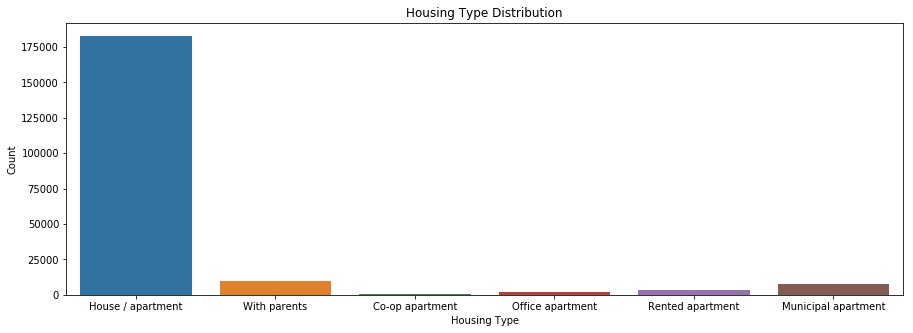

In [227]:
plt.figure(figsize=(15,5))
sns.countplot(X_train.NAME_HOUSING_TYPE.values,data=X_train)
plt.xlabel('Housing Type'); plt.ylabel('Count'); plt.title('Housing Type Distribution');

## Age of Client

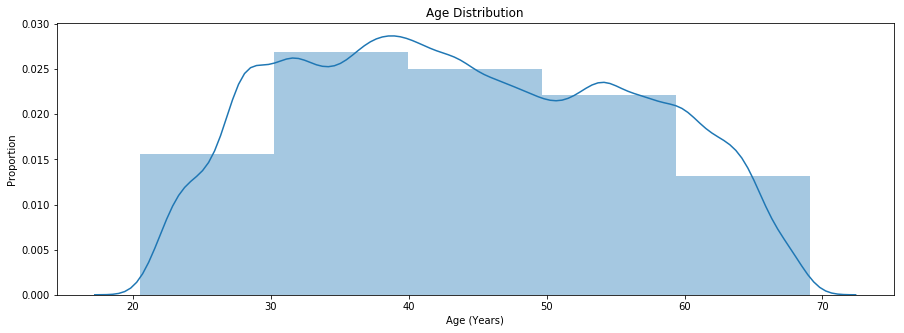

In [228]:
# transformation of variable to absolute value (to capture age)
X_train['DAYS_BIRTH'] = abs(X_train['DAYS_BIRTH'])
X_test['DAYS_BIRTH'] = abs(X_test['DAYS_BIRTH'])

# plot distribution
plt.figure(figsize=(15,5))
sns.distplot(X_train['DAYS_BIRTH'] / 365,bins=5)
plt.xlabel('Age (Years)'); plt.ylabel('Proportion'); plt.title('Age Distribution');

## Age and Target

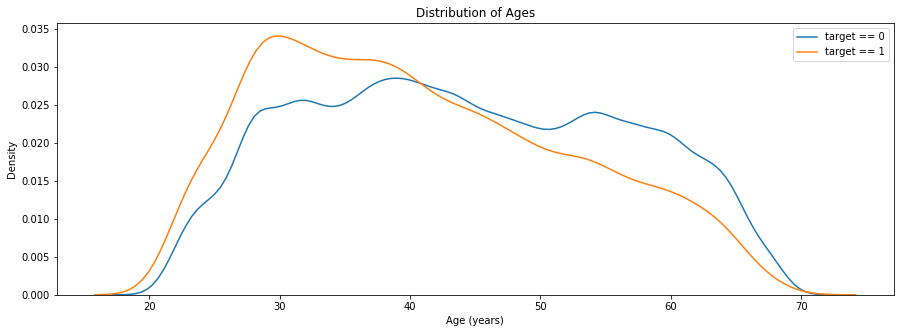

In [229]:
plt.figure(figsize=(15,5))

# KDE plot of loans that were repaid on time
sns.kdeplot(X_train.loc[y_train == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(X_train.loc[y_train == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

## Population of Region

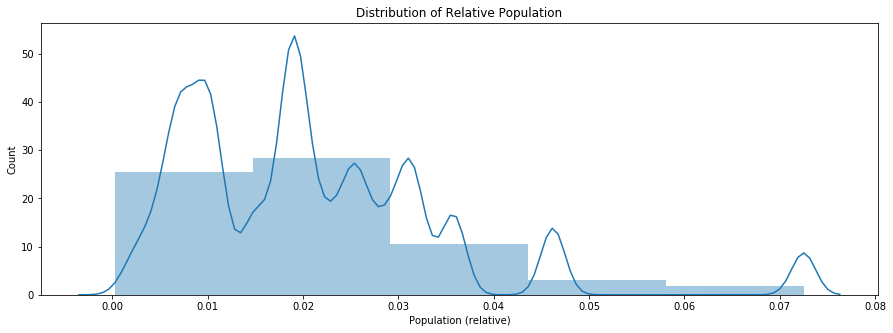

In [230]:
plt.figure(figsize=(15,5))
sns.distplot(X_train['REGION_POPULATION_RELATIVE'],bins=5)
plt.xlabel('Population (relative)'); plt.ylabel('Count'); plt.title('Distribution of Relative Population');

## Population and Target

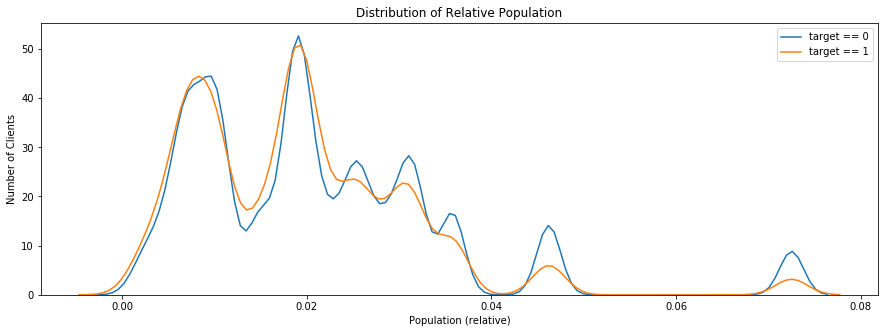

In [231]:
plt.figure(figsize=(15,5))

# KDE plot of loans that were repaid on time
sns.kdeplot(X_train.loc[y_train == 0, 'REGION_POPULATION_RELATIVE'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(X_train.loc[y_train == 1, 'REGION_POPULATION_RELATIVE'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Population (relative)'); plt.ylabel('Number of Clients'); plt.title('Distribution of Relative Population');

## One-Hot Encoding

In [232]:
# one-hot encoding of categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

print('Training Features shape: ', X_train.shape)
print('Testing Features shape: ', X_test.shape)

Training Features shape:  (206032, 246)
Testing Features shape:  (101479, 246)


## Handle outliers and awkward data

In [233]:
# convert days_birth to age by taking the absolute value
X_train['DAYS_BIRTH'] = abs(X_train['DAYS_BIRTH'])
X_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

## Feature Engineering: Create New Features

In [234]:
# CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
X_train['CREDIT_INCOME_PERCENT'] = X_train['AMT_CREDIT'] / X_train['AMT_INCOME_TOTAL']

# ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
X_train['ANNUITY_INCOME_PERCENT'] = X_train['AMT_ANNUITY'] / X_train['AMT_INCOME_TOTAL']

# CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
X_train['CREDIT_TERM'] = X_train['AMT_ANNUITY'] / X_train['AMT_CREDIT']

# DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age
X_train['DAYS_EMPLOYED_PERCENT'] = X_train['DAYS_EMPLOYED'] / X_train['DAYS_BIRTH']

In [235]:
# CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
X_test['CREDIT_INCOME_PERCENT'] = X_test['AMT_CREDIT'] / X_test['AMT_INCOME_TOTAL']

# ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
X_test['ANNUITY_INCOME_PERCENT'] = X_test['AMT_ANNUITY'] / X_test['AMT_INCOME_TOTAL']

# CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
X_test['CREDIT_TERM'] = X_test['AMT_ANNUITY'] / X_test['AMT_CREDIT']

# DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age
X_test['DAYS_EMPLOYED_PERCENT'] = X_test['DAYS_EMPLOYED'] / X_test['DAYS_BIRTH']

## Missing Values
Remove columns from training and testing datasets with greater than 80 percent of values missing.

In [236]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [237]:
# Missing values statistics
missing_train = missing_values_table(X_train)
missing_train.head(10)

Your selected dataframe has 250 columns.
There are 63 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,143907,69.8
COMMONAREA_MEDI,143907,69.8
COMMONAREA_MODE,143907,69.8
NONLIVINGAPARTMENTS_MEDI,142972,69.4
NONLIVINGAPARTMENTS_MODE,142972,69.4
NONLIVINGAPARTMENTS_AVG,142972,69.4
LIVINGAPARTMENTS_MODE,140750,68.3
LIVINGAPARTMENTS_MEDI,140750,68.3
LIVINGAPARTMENTS_AVG,140750,68.3
FLOORSMIN_MEDI,139688,67.8


In [238]:
missing_train_vars = list(missing_train.index[missing_train['% of Total Values'] > 80])
len(missing_train_vars)

0

In [239]:
missing_test = missing_values_table(X_test)
missing_test.head(10)

Your selected dataframe has 250 columns.
There are 64 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,70958,69.9
COMMONAREA_MEDI,70958,69.9
COMMONAREA_AVG,70958,69.9
NONLIVINGAPARTMENTS_AVG,70542,69.5
NONLIVINGAPARTMENTS_MEDI,70542,69.5
NONLIVINGAPARTMENTS_MODE,70542,69.5
LIVINGAPARTMENTS_MODE,69449,68.4
LIVINGAPARTMENTS_MEDI,69449,68.4
LIVINGAPARTMENTS_AVG,69449,68.4
FLOORSMIN_AVG,68954,67.9


In [240]:
missing_test_vars = list(missing_test.index[missing_test['% of Total Values'] > 80])
len(missing_test_vars)

0

In [241]:
missing_columns = list(set(missing_test_vars + missing_train_vars))
print('There are %d columns with more than 80%% missing in either the training or testing data.' % len(missing_columns))

There are 0 columns with more than 80% missing in either the training or testing data.


In [242]:
# Drop the missing columns
X_train = X_train.drop(columns = missing_columns)
X_test = X_test.drop(columns = missing_columns)

## Colinear Variables
Calculate  the correlation of each variable with every other variable. This will allow us to see if there are highly collinear variables that should perhaps be removed from the data. Look for any variables that have a greather than 0.8 correlation with other variables.

In [254]:
# Calculate all correlations in dataframe
corrs = X_train.corr()

corrs = corrs.sort_values('TARGET', ascending = False)

# Ten most positive correlations
pd.DataFrame(corrs['TARGET'].head(10))

,TARGET
TARGET,1.000000
REGION_RATING_CLIENT,0.058957
NAME_INCOME_TYPE_Working,0.056278
CODE_GENDER_M,0.055463
DAYS_LAST_PHONE_CHANGE,0.054162
DAYS_ID_PUBLISH,0.052911
REG_CITY_NOT_WORK_CITY,0.051113
NAME_EDUCATION_TYPE_Secondary / secondary special,0.049584
FLAG_EMP_PHONE,0.046226
REG_CITY_NOT_LIVE_CITY,0.045963


In [255]:
# Ten most negative correlations
pd.DataFrame(corrs['TARGET'].dropna().tail(10))

,TARGET
FLOORSMAX_AVG,-0.043946
DAYS_EMPLOYED,-0.045137
ORGANIZATION_TYPE_XNA,-0.046200
NAME_INCOME_TYPE_Pensioner,-0.046455
CODE_GENDER_F,-0.055454
NAME_EDUCATION_TYPE_Higher education,-0.055658
DAYS_BIRTH,-0.078409
EXT_SOURCE_1,-0.154085
EXT_SOURCE_2,-0.159536
EXT_SOURCE_3,-0.180061


In [256]:
# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])
    
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  4


In [257]:
# remove columns from training and testing sets
X_train = X_train.drop(columns = cols_to_remove)
X_test = X_test.drop(columns = cols_to_remove)

print('Training Corrs Removed Shape: ', X_train.shape)
print('Testing Corrs Removed Shape: ', X_test.shape)

Training Corrs Removed Shape:  (206032, 207)
Testing Corrs Removed Shape:  (101479, 207)


## Impute Missing Values and Scale Features

In [258]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Remove the ids and target
features = X_train.drop(columns = ['SK_ID_CURR', 'TARGET'])
test_features = X_test.drop(columns = ['SK_ID_CURR', 'TARGET'])

print('Training Data Shape: ', features.shape)
print('Testing Data Shape: ', test_features.shape)

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(features)

# Transform both training and testing data
features = imputer.transform(features)
test_features = imputer.transform(test_features)

# Repeat with the scaler
scaler.fit(features)
features = scaler.transform(features)
test_features = scaler.transform(test_features)


# Convert to np arrays
X_train = np.array(features)
X_test = np.array(test_features)

Training Data Shape:  (206032, 205)
Testing Data Shape:  (101479, 205)


# Build Models

## Training and Cross-Validation

### Logistic Regression: Initial Attempt (Benchmark)

In [259]:
name = 'Logistic Regression'

# initialize model
lr_model = LogisticRegression(C=0.0001)

# run basic model
kfold = KFold(n_splits=3, random_state=42)
cv_results = cross_val_score(lr_model, X_train, y_train, cv=kfold, scoring='roc_auc')
message = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(message) # results

Logistic Regression: 0.660709 (0.000696)


### Logistic Regression: Improved with Parameter Tuning

In [260]:
param_grid = [
    {'C': [0.0001,0.001,0.01,0.1,1]}  
]

# initialize model
lr_model = LogisticRegression()

# find best hyper params
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# reset to improved version after grid search
lr_model = grid_search.best_estimator_

kfold = KFold(n_splits=5, random_state=42)
cv_results = cross_val_score(lr_model, X_train, y_train, cv=kfold, scoring='roc_auc')
message = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(message) # results
print() # line break
print(lr_model) # best model
print()

Logistic Regression: 0.742522 (0.004094)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)



### Decision Tree Classifier (CART): Initial Attempt

In [261]:
name = 'Decision Tree Classifier (CART)'

# initialize model
cart_model = DecisionTreeClassifier()

# run basic model
kfold = KFold(n_splits=2, random_state=42)
cv_results = cross_val_score(cart_model, X_train, y_train, cv=kfold, scoring='roc_auc')
message = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(message)

Decision Tree Classifier (CART): 0.537702 (0.001290)


### Decision Tree Classifier (CART): Improved with Parameter Tuning

In [262]:
param_grid = [
    {'criterion':['gini','entropy'],'max_depth':[4,10,16]}
]

# initialize model
cart_model = DecisionTreeClassifier()

# find best hyper params
grid_search = GridSearchCV(cart_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# reset to improved version after grid search
cart_model = grid_search.best_estimator_

# run cross validation and get score
kfold = KFold(n_splits=5, random_state=42)
cv_results = cross_val_score(cart_model, X_train, y_train, cv=kfold, scoring='roc_auc')
message = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(message)
print() # line break
print(cart_model) # best model
print()

Decision Tree Classifier (CART): 0.701758 (0.002989)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')



### Random Forest Classifier: Initial Attempt

In [263]:
name = 'Random Forest Classifier'

# initialize model
rf_model = RandomForestClassifier()

# run cross validation and get score
kfold = KFold(n_splits=2, random_state=42)
cv_results = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='roc_auc')
message = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(message)

Random Forest Classifier: 0.624330 (0.003966)


### Random Forest Classifier: Improved with Parameter Tuning

In [264]:
param_grid = [
    {'n_estimators' : [3, 10],'max_features':[1,3,6,10]},
]

# initialize model
rf_model = RandomForestClassifier()

# find best hyper params
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# reset to improved version after grid search
rf_model = grid_search.best_estimator_

# run cross validation and get score
kfold = KFold(n_splits=5, random_state=42)
cv_results = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='roc_auc')
message = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(message)
print() # line break
print(rf_model) # best model
print()

Random Forest Classifier: 0.623610 (0.003580)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)



### Gaussian Naive Bayes: Single Attempt (no parameter tuning)

In [265]:
name = 'Gaussian Naive Bayes'
nb_model = GaussianNB()
kfold = KFold(n_splits=5, random_state=42)
cv_results = cross_val_score(nb_model, X_train, y_train, cv=kfold, scoring='roc_auc')
message = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(message)
print() # line break

Gaussian Naive Bayes: 0.530414 (0.013255)



### AdaBoost Classifier: Single Attempt (no parameter tuning)

In [266]:
name = 'AdaBoost Classifier'

# initialize model
ab_model = AdaBoostClassifier()

# run cross validation and get score
kfold = KFold(n_splits=5, random_state=42)
cv_results = cross_val_score(ab_model, X_train, y_train, cv=kfold, scoring='roc_auc')
message = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(message)

AdaBoost Classifier: 0.744505 (0.002412)


### Voting Classifier: Single Attempt (no parameter tuning)

In [267]:
name = 'Voting Classifier'

voting_model = VotingClassifier(estimators=[('lr', lr_model), ('rfc', rf_model), ('cart', cart_model), ('nm', nb_model), ('abc', ab_model)], 
                          voting='soft')

kfold = KFold(n_splits=5, random_state=42)
cv_results = cross_val_score(voting_model, X_train, y_train, cv=kfold, scoring='roc_auc')
message = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(message)

Voting Classifier: 0.714858 (0.001811)


## Evaluation on Test Set

### Logistic Regression

In [274]:
predictions = lr_model.predict(X_test)
score = roc_auc_score(y_test, predictions)
message = "Logistic Regression: " + str(score)
print(message)

Logistic Regression: 0.5049360602632484


### Decision Tree Classifier (CART)

In [275]:
predictions = cart_model.predict(X_test)
score = roc_auc_score(y_test, predictions)
message = "Decision Tree Classifier (CART): " + str(score)
print(message)

Decision Tree Classifier (CART): 0.5098992028382532


### Random Forest Classifier

In [276]:
predictions = rf_model.predict(X_test)
score = roc_auc_score(y_test, predictions)
message = "Random Forest Classifier: " + str(score)
print(message)

Random Forest Classifier: 0.5035246361628289


### Gaussian Naive Bayes

In [280]:
nb_model.fit(X_train, y_train)
predictions = nb_model.predict(X_test)
score = roc_auc_score(y_test, predictions)
message = "Gaussian Naive Bayes: " + str(score)
print(message)

Gaussian Naive Bayes: 0.5127219197413108


### AdaBoost Classifier

In [283]:
ab_model.fit(X_train, y_train)
predictions = ab_model.predict(X_test)
score = roc_auc_score(y_test, predictions)
message = "AdaBoost: " + str(score)
print(message)

AdaBoost: 0.5084579860176017


### Voting Classifier

In [286]:
voting_model.fit(X_train, y_train)
predictions = voting_model.predict(X_test)
score = roc_auc_score(y_test, predictions)
message = "Voting Classifier: " + str(score)
print(message)

Voting Classifier: 0.5240806597293635
